In [32]:
# Change it to the environment location
!D:\软件\Python\python.exe -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_sm

                                              0.0/12.8 MB ? eta -:--:--
                                              0.2/12.8 MB 3.5 MB/s eta 0:00:04
                                              0.3/12.8 MB 3.2 MB/s eta 0:00:04
     -                                        0.6/12.8 MB 4.4 MB/s eta 0:00:03
     --                                       0.7/12.8 MB 4.8 MB/s eta 0:00:03
     ---                                      1.0/12.8 MB 4.3 MB/s eta 0:00:03
     ---                                      1.1/12.8 MB 4.5 MB/s eta 0:00:03
     ----                                     1.3/12.8 MB 4.0 MB/s eta 0:00:03
     -----                                    1.6/12.8 MB 4.4 MB/s eta 0:00:03
     ------                                   1.9/12.8 MB 4.8 MB/s eta 0:00:03
     ------                                   2.2/12.8 MB 4.8 MB/s eta 0:00:03
     -------                                  2.4/12.8 MB 4.9 MB/s eta 0:00:03
     --------                                 2.7/12.8 MB 4


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "D:\软件\Python\Lib\site-packages\spacy\__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "D:\软件\Python\Lib\site-packages\spacy\errors.py", line 3, in <module>
    from .compat import Literal
  File "D:\软件\Python\Lib\site-packages\spacy\compat.py", line 4, in <module>
    from thinc.util import copy_array
  Fi

In [3]:
# !pip install textblob
# !pip install --upgrade pandas --user
# !pip install --upgrade numpy --user
# !pip uninstall numpy
# !pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
spacy-pkuseg 1.0.0 requires numpy<3.0.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: D:\软件\Python\python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
from collections import Counter
from textblob import TextBlob
from matplotlib import pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cshch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cshch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
df = pd.read_csv('merged_df.csv')

C:\Users\cshch\AppData\Local\Temp\ipykernel_23144\1097084762.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_df.csv')


In [9]:
df.head()

,Title,Abstract,Disciplines,Keywords,Source
0,The Veldkamp Space of Two-Qubits,Given a remarkable representation of the gen...,Physics,NaN,arXiv
1,Axiom A polynomial skew products of C^2 and th...,A polynomial skew product of C^2 is a map of...,Mathematics,NaN,arXiv
2,"Quasi Ordinary Singularities, Essential Diviso...",We define Poincar\'e series associated to a ...,Mathematics,NaN,arXiv
3,Third Order Newton's Method for Zernike Polyno...,The Zernike radial polynomials are a system ...,Mathematics,NaN,arXiv
4,Quantum Properties and Gravitational Field of ...,We find that a field with oscillations of ma...,Physics,NaN,arXiv


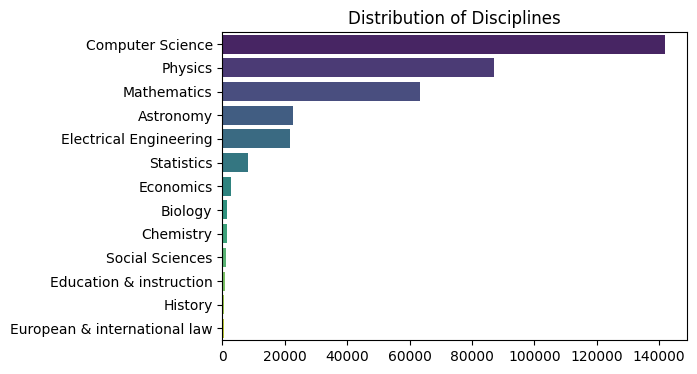

In [26]:
all_tags = [tag for sublist in df['Disciplines'].apply(lambda x: x.split('/')) for tag in sublist]
tag_counts = Counter(all_tags)
tag_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count'])
tag_df = tag_df.sort_values(by='Count', ascending=False)

print()

plt.figure(figsize=(6, 4))
sns.barplot(y=tag_df.index, hue=tag_df.index, x=tag_df['Count'], palette='viridis')

plt.title('Distribution of Disciplines')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [37]:
# Transform the dataframe to conduct the rows with disciplines of A/B/C
from sklearn.preprocessing import MultiLabelBinarizer
df['Disciplines_split'] = df['Disciplines'].apply(lambda x: x.split('/'))
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(df['Disciplines_split'])

tag_df = pd.DataFrame(tag_matrix, columns=mlb.classes_)
df_Binary = pd.concat([df, tag_df], axis=1)
print(df_Binary.head())

                                               Title  \
0                   The Veldkamp Space of Two-Qubits   
1  Axiom A polynomial skew products of C^2 and th...   
2  Quasi Ordinary Singularities, Essential Diviso...   
3  Third Order Newton's Method for Zernike Polyno...   
4  Quantum Properties and Gravitational Field of ...   

                                            Abstract  Disciplines Keywords  \
0    Given a remarkable representation of the gen...      Physics      NaN   
1    A polynomial skew product of C^2 is a map of...  Mathematics      NaN   
2    We define Poincar\'e series associated to a ...  Mathematics      NaN   
3    The Zernike radial polynomials are a system ...  Mathematics      NaN   
4    We find that a field with oscillations of ma...      Physics      NaN   

  Source Disciplines_split  Astronomy  Biology  Chemistry  Computer Science  \
0  arXiv         [Physics]          0        0          0                 0   
1  arXiv     [Mathematics]          

In [61]:
# Creating the 'preprocess' function
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from textblob import TextBlob
import string

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    text_sub = re.sub(r"^\[en\]\s*", "", text) # delete the [en] in the beginning
    # text_rm_punc = text_sub.translate(str.maketrans("", "", string.punctuation)) # Remove punctuation in the following
    doc = nlp(str(text_sub))

    # Tokenization and Remove unwanted characters
    tokens = [token.text for token in doc if not token.is_punct]  # Removing punctuation and get tokens
    # print("Cleaned Tokens:", tokens)

    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.strip()]
    # print("Filtered Tokens:", filtered_tokens)

    # Lemmatization
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() in filtered_tokens]
    # print("Lemmatized Tokens:", lemmatized_tokens)

    # Stemming
    # stemmer = PorterStemmer()
    # stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens] # Didn't do this step to remain the meaning of the words
    # print("Stemmed Tokens:", stemmed_tokens)

    # Correct spelling using TextBlob
    # corrected_text = ' '.join(stemmed_tokens)  # Join tokens into a string
    # blob = TextBlob(corrected_text)
    # corrected_review = blob.correct()
    # print("Corrected Review:", corrected_review)

    return ' '.join(lemmatized_tokens) # Return lemmatized tokens as a space-separated string

In [67]:
import pandas as pd

# Make a copy of the original DataFrame
df_copy = df_Binary.copy()

# Define the chunk size
chunk_size = 10000
num_chunks = len(df_copy) // chunk_size + 1

# Process each chunk and save to CSV
for i in range(3,num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(df_copy))

    # Process the chunk
    chunk = df_copy.iloc[start_idx:end_idx].copy()
    chunk['processed_abstract'] = chunk['Abstract'].apply(preprocess)

    # Save the chunk to CSV
    chunk.to_csv(f'merged_df_abstract_preprocess_{i + 1}.csv', index=False)

    # Output message indicating the progress
    print(f'CSV file {i + 1} saved with {len(chunk)} rows.')

# Output completion message
print("All files processed and saved successfully.")


CSV file 4 saved with 10000 rows.
CSV file 5 saved with 10000 rows.
CSV file 6 saved with 10000 rows.
CSV file 7 saved with 10000 rows.
CSV file 8 saved with 10000 rows.
CSV file 9 saved with 10000 rows.
CSV file 10 saved with 10000 rows.
CSV file 11 saved with 10000 rows.
CSV file 12 saved with 10000 rows.
CSV file 13 saved with 10000 rows.
CSV file 14 saved with 10000 rows.
CSV file 15 saved with 10000 rows.
CSV file 16 saved with 10000 rows.
CSV file 17 saved with 10000 rows.
CSV file 18 saved with 10000 rows.
CSV file 19 saved with 10000 rows.
CSV file 20 saved with 10000 rows.
CSV file 21 saved with 10000 rows.
CSV file 22 saved with 10000 rows.
CSV file 23 saved with 10000 rows.
CSV file 24 saved with 10000 rows.
CSV file 25 saved with 10000 rows.
CSV file 26 saved with 10000 rows.
CSV file 27 saved with 10000 rows.
CSV file 28 saved with 10000 rows.
CSV file 29 saved with 10000 rows.
CSV file 30 saved with 10000 rows.
CSV file 31 saved with 10000 rows.
CSV file 32 saved with 156

In [1]:
import pandas as pd

# Initialize an empty DataFrame to store all data
merged_df = pd.DataFrame()

# Loop through the 31 CSV files and append their data
for i in range(1, 33):
    file_name = f'merged_df_abstract_preprocess_{i}.csv'
    try:
        # Read each file and append to the merged DataFrame
        temp_df = pd.read_csv(file_name)
        merged_df = pd.concat([merged_df, temp_df], ignore_index=True)
        print(f"File '{file_name}' loaded successfully.")
    except FileNotFoundError:
        print(f"File '{file_name}' not found. Skipping.")

# Save the merged DataFrame to a single CSV file
merged_df.to_csv('merged_df_abstract_preprocess_all.csv', index=False)

print("All files merged and saved successfully as 'merged_df_abstract_preprocess_all.csv'.")

File 'merged_df_abstract_preprocess_1.csv' loaded successfully.
File 'merged_df_abstract_preprocess_2.csv' loaded successfully.
File 'merged_df_abstract_preprocess_3.csv' loaded successfully.
File 'merged_df_abstract_preprocess_4.csv' loaded successfully.
File 'merged_df_abstract_preprocess_5.csv' loaded successfully.
File 'merged_df_abstract_preprocess_6.csv' loaded successfully.
File 'merged_df_abstract_preprocess_7.csv' loaded successfully.
File 'merged_df_abstract_preprocess_8.csv' loaded successfully.
File 'merged_df_abstract_preprocess_9.csv' loaded successfully.
File 'merged_df_abstract_preprocess_10.csv' loaded successfully.
File 'merged_df_abstract_preprocess_11.csv' loaded successfully.
File 'merged_df_abstract_preprocess_12.csv' loaded successfully.
File 'merged_df_abstract_preprocess_13.csv' loaded successfully.
File 'merged_df_abstract_preprocess_14.csv' loaded successfully.
File 'merged_df_abstract_preprocess_15.csv' loaded successfully.
File 'merged_df_abstract_preproces

In [2]:
df_apl = pd.read_csv('merged_df_abstract_preprocess_all.csv')
print(df_apl.columns)

Index(['Title', 'Abstract', 'Disciplines', 'Keywords', 'Source',
       'Disciplines_split', 'Astronomy', 'Biology', 'Chemistry',
       'Computer Science', 'Economics', 'Education & instruction',
       'Electrical Engineering', 'European & international law', 'History',
       'Mathematics', 'Physics', 'Social Sciences', 'Statistics',
       'processed_abstract'],
      dtype='object')


C:\Users\cshch\AppData\Local\Temp\ipykernel_9316\1140665813.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_apl = pd.read_csv('merged_df_abstract_preprocess_all.csv')


In [5]:
import pandas as pd
from collections import Counter

# Step 1: Load the dataset
df_apl = pd.read_csv('merged_df_abstract_preprocess_all.csv')

# Step 2: Define the specified discipline columns
discipline_cols = [
    'Astronomy', 'Biology', 'Chemistry', 'Computer Science', 'Economics',
    'Education & instruction', 'Electrical Engineering',
    'European & international law', 'History', 'Mathematics', 'Physics',
    'Social Sciences', 'Statistics'
]

# Step 3: Initialize a list to store the results
freq_distribution_results = []

# Step 4: Loop through each discipline to calculate word frequencies
for discipline in discipline_cols:
    # Filter rows where the discipline is active (discipline value is 1)
    discipline_rows = df_apl[df_apl[discipline] == 1]

    # Count the total number of articles for the discipline
    total_articles = len(discipline_rows)

    # Concatenate all processed_abstract values for the discipline
    all_words = ' '.join(discipline_rows['processed_abstract'].dropna()).split()

    # Count word frequencies using Counter
    word_count = Counter(all_words)

    # Categorize frequencies
    freq_1000 = sum(1 for count in word_count.values() if count > 1000)
    freq_100 = sum(1 for count in word_count.values() if 100 < count <= 1000)
    freq_10 = sum(1 for count in word_count.values() if 10 < count <= 100)
    freq_below_10 = sum(1 for count in word_count.values() if count <= 10)

    # Append results for the current discipline
    freq_distribution_results.append({
        'Discipline': discipline,
        'Total Articles': total_articles,  # Add total number of articles for this discipline
        'freq_>1000': freq_1000,
        'freq_101-1000': freq_100,
        'freq_11-100': freq_10,
        'freq_<=10': freq_below_10
    })

# Step 5: Create a DataFrame from the results and save to CSV
freq_distribution_df = pd.DataFrame(freq_distribution_results)
freq_distribution_df.to_csv('discipline_word_frequency_distribution_with_totals.csv', index=False)

# Step 6: Output the results to console
print(freq_distribution_df)


C:\Users\cshch\AppData\Local\Temp\ipykernel_9316\1107138412.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_apl = pd.read_csv('merged_df_abstract_preprocess_all.csv')


                      Discipline  Total Articles  freq_>1000  freq_101-1000  \
0                      Astronomy           22628         636           1973   
1                        Biology            1521           4            363   
2                      Chemistry            1412           6            312   
3               Computer Science          141950        2076           4142   
4                      Economics            2707           9            526   
5        Education & instruction             793           5            204   
6         Electrical Engineering           21651         512           1999   
7   European & international law             509           0             51   
8                        History             587           0             57   
9                    Mathematics           63444         802           2459   
10                       Physics           87092        1533           3540   
11               Social Sciences            1076    

In [6]:
# Filter the frequenct words
# import pandas as pd
# from collections import Counter
#
# # Step 1: Load the dataset
# df_apl = pd.read_csv('merged_df_abstract_preprocess_all.csv')
#
# # Step 2: Define the specified discipline columns
# discipline_cols = [
#     'Astronomy', 'Biology', 'Chemistry', 'Computer Science', 'Economics',
#     'Education & instruction', 'Electrical Engineering',
#     'European & international law', 'History', 'Mathematics', 'Physics',
#     'Social Sciences', 'Statistics'
# ]
#
# # Step 3: Loop through each discipline to filter out low frequency words
# for discipline in discipline_cols:
#     # Filter rows where the discipline is active (discipline value is 1)
#     discipline_rows = df_apl[df_apl[discipline] == 1]
#
#     # Concatenate all processed_abstract values for the discipline
#     all_words = ' '.join(discipline_rows['processed_abstract'].dropna()).split()
#
#     # Count word frequencies using Counter
#     word_count = Counter(all_words)
#
#     # Get the set of words that have frequency > 10
#     valid_words = {word for word, count in word_count.items() if count > 10}
#
#     # Create a function to filter words in the processed_abstract column
#     def filter_abstract(text):
#         words = text.split()
#         filtered_words = [word for word in words if word in valid_words]
#         return ' '.join(filtered_words)
#
#     # Create the new filtered_abstract column
#     df_apl[f'filtered_abstract_{discipline}'] = df_apl['processed_abstract'].apply(filter_abstract)
#
# # Step 4: Save the new DataFrame with the filtered_abstract columns to a CSV file
# df_apl.to_csv('merged_df_abstract_filtered.csv', index=False)
#
# # Step 5: Output message indicating success
# print("Filtered abstracts created and saved successfully.")


C:\Users\cshch\AppData\Local\Temp\ipykernel_9316\1954611895.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_apl = pd.read_csv('merged_df_abstract_preprocess_all.csv')


AttributeError: 'float' object has no attribute 'split'

In [8]:
# remove the unnecessary columns
columns = ['processed_abstract'] + [col for col in df_apl.columns if col != 'processed_abstract']
columns_to_drop = ['Title', 'Abstract', 'Disciplines', 'Keywords', 'Source', 'Disciplines_split']
df_merged_processed = df_apl[columns].drop(columns=columns_to_drop, errors='ignore')

df_merged_processed.to_csv('merged_df_processed.csv', index=False)

In [11]:
print(df_merged_processed.head())

                                  processed_abstract  Astronomy  Biology  \
0  remarkable representation generalized operator...          0        0   
1  polynomial skew product map form f(z w = p(z q...          0        0   
2  define series associate toric analytically irr...          0        0   
3  radial polynomial system orthogonal polynomial...          0        0   
4  find field oscillation matter proper time prop...          0        0   

   Chemistry  Computer Science  Economics  Education & instruction  \
0          0                 0          0                        0   
1          0                 0          0                        0   
2          0                 0          0                        0   
3          0                 0          0                        0   
4          0                 0          0                        0   

   Electrical Engineering  European & international law  History  Mathematics  \
0                       0                